# Определение закономерностей формирующих успешность игры 

![](https://i.ibb.co/h2wfnr3/Games-2000x1125.jpg)

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, **Xbox** или **PlayStation**). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Мы планируете кампанию на 2017-й.
 
*Данные за 2016 год могут быть неполными*


## Общая информация о данных в работе

### Загрузка и предварительный осмотр данных

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
from scipy import stats as st
sns.set_style("darkgrid")


In [ ]:
game_df = pd.read_csv('/content/games.csv')
game_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Наблюдаем пропуски в столбцах `Year_of_Release`, `Critic_score`, `User_score`, `Rating` и незначительные пропуски в столбцах `Name` и `Genre`. Наиболее критичные пропуски в столбцах оценок и рейтинга, которые нужны для анализа. Дата сет содержит информацию об играх, выпущенных с 1980 года - возможно данные пропуски связаны с тем, что для более ранних игр - оценки не приводилось, в т.ч. в связи с неразвитой сетью интернет или отсутствием четких критериев для формирования рейтинга. 

### Описание данных
- **Name** — название игры  
- **Platform** — платформа  
- **Year_of_Release** — год выпуска  
- **Genre** — жанр игры  
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
- **EU_sales** — продажи в Европе (миллионы проданных копий)  
- **JP_sales** — продажи в Японии (миллионы проданных копий)  
- **Other_sales** — продажи в других странах (миллионы проданных копий)  
- **Critic_Score** — оценка критиков (максимум 100)  
- **User_Score** — оценка пользователей (максимум 10)  
- **Rating** — рейтинг от организации [ESRB](https://www.esrb.org/) (англ. Entertainment Software Rating Board).


- на первый взгляд, аномалий не выявлено  
- в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` - наблюдаются пропуски, особенно в столбцах рейтингов/оценки. Пропуски изучим и примем решение, что с ними делать
- необходимо заменить данные в столбце `Year_of_Release` - `float` на `int`. `datetime` нет необходимости вводить
- по остальным столбцам необходимо дополнительное изучение, например: `User_Score` имеет тип object, значит в столбце находится нечисловое значение


## Предобработка данных

### Замена названий столбцов. 

In [ ]:
game_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия столбцов к нижнему регистру для удобства работы

In [ ]:
game_df.columns = game_df.columns.str.lower()
game_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Наличие дубликатов в сете данных. 


In [ ]:
game_df.duplicated().sum()

0

Дубликатов не обнаружили. Необходимо перейти к пропускам и их обработке

### Подсчет пропусков и их обработка

In [ ]:
game_df.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
genre              0.000120
name               0.000120
other_sales        0.000000
jp_sales           0.000000
eu_sales           0.000000
na_sales           0.000000
platform           0.000000
dtype: float64

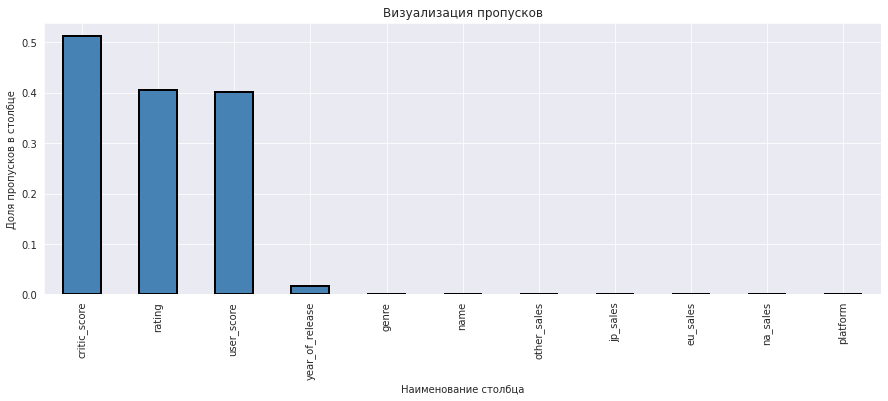

In [ ]:
game_df.isna().mean().sort_values(ascending=False).plot(
                                                  kind='bar', figsize=(15,5), 
                                                  grid=True, color='steelblue', 
                                                  edgecolor='black', linewidth=2
                                                  )
plt.title('Визуализация пропусков')
plt.xlabel('Наименование столбца')
plt.ylabel('Доля пропусков в столбце')
plt.show()

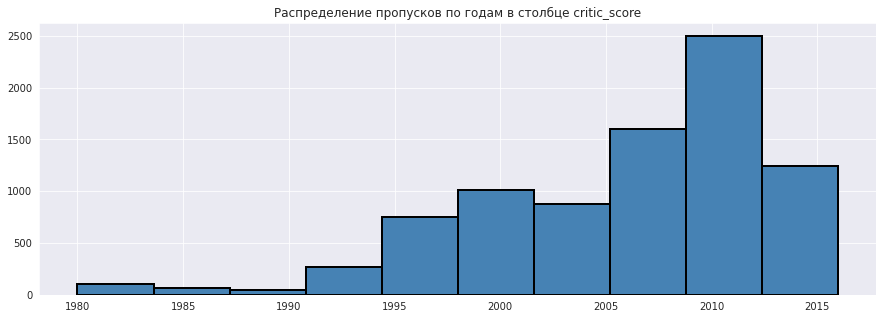

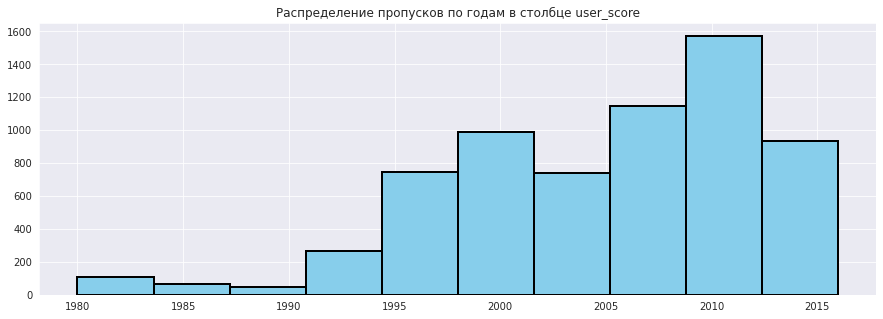

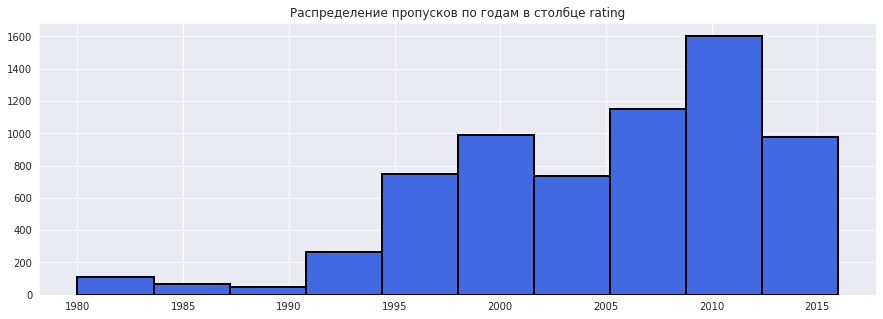

In [ ]:
columns_list = ['critic_score', 'user_score', 'rating']
title_list = ['Распределение пропусков по годам в столбце critic_score', 
              'Распределение пропусков по годам в столбце user_score', 
              'Распределение пропусков по годам в столбце rating']

color_list=['steelblue', 'skyblue', 'royalblue']

#цикл построения наших графиков с интересующими нас параметрами

for i in tqdm(range(len(columns_list))):
    plt.figure(figsize=(15, 5))
    plt.hist(game_df.loc[game_df[columns_list[i]].isna(), 'year_of_release'], 
            color=color_list[i], edgecolor='black', linewidth=2
            )
    plt.title(title_list[i])
    plt.xlabel('') # для удаления названий столбцов
    plt.show()

К сожалению, большинство пропусков наблюдается с 2000 года. Связать это с отсутствием системы оценки нельзя

#### Столбец `critic_score`

Большое количество пропусков в стобце `critic_score`. Данные отсутствуют в зависимости от неизвестных факторов. Вероятность пропуска невозможно выразить на основе информации, содержащейся в наборе данных. Изначально преподлагали, что пропуски наблюдаются у старых игр, но на удивление - наибольшее количество пропусков наблюдается с 2010 года.  

Так как уточнить возможности нет - можно применить индикаторную замену пропусков, например, на `-1`, но тогда вырастает вероятность ошибки при срезе - можем упустить данный факт - заменим на Nan. Если удалить строки - это сильно исказит анализ.


In [ ]:
game_df['critic_score'] = game_df['critic_score'].fillna(np.nan)
print('Количество пропусков в столбце critic_score - {}'.format(
                                                                game_df['critic_score'].isna().sum())
                                                                )


Количество пропусков в столбце critic_score - 8578


#### Столбец `user_score`

In [ ]:
game_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
print('tbd встречается:', len(game_df[game_df['user_score'] == 'tbd']), 'раза')

tbd встречается: 2424 раза


Встречается значение `tbd`. Из за этого столбец имеет тип `object`. 

[TBD](http://mobilradio.ru/information/vocabulary/tbd.htm) - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований

Поступим аналогично `critic_score` - tbd принимаем как Nan. Пропуски не удаляем. Можно было бы применить индикаторный метод замены пропусков - но это увеличивает риски на неточный анализ. 

In [ ]:
game_df['user_score'] = game_df['user_score'].replace('tbd', np.nan)
print('Количество пропусков в столбце user_score - {}'.format(
                                                                game_df['user_score'].isna().sum())
                                                                )


Количество пропусков в столбце user_score - 9125


#### Столбец `rating`

In [ ]:
game_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для [справки](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):  

- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone». 
 
 
- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")  
  
  
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.  
  
  
- **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование  
  
  
- **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.  
  
  
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.  
  
  
- **«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу  

Помимо пропусков обнаружили, что имеем несколько вариантов названий по одному уровню рейтинга. Необходимо `K-A` переименовать в `E`. `RP` - тоже приравняем к Nan, аналогично tbd.

Nan в этом случае заменим значением `RP`, так как столбец имеет тип `object`, числа нам не нужны

In [ ]:
game_df['rating'] = game_df['rating'].replace('K-A', 'E').fillna('RP')
print('Количество пропусков в столбце rating - {}'.format(
                                                                game_df['rating'].isna().sum())
                                                                )



Количество пропусков в столбце rating - 0


#### Столбец `year_of_release`

Посмотрим количество пропусков столбца `year_of_release`:

In [ ]:
len(game_df[game_df['year_of_release'].isna()])

269

In [ ]:
game_df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

269 пропусков по столбцу год. Можно было бы провести исследование и восстановить пропуски, но это 269 строк. Заменим на `0`, после обработки создадим новый датафрейм, исключив данные строки

In [ ]:
game_df['year_of_release'] = game_df['year_of_release'].fillna(0)
print('Количество пропусков в столбце year_of_release - {}'.format(
                                                                game_df['year_of_release'].isna().sum())
                                                                )

Количество пропусков в столбце year_of_release - 0


#### Столбец `name` и `genre`

In [ ]:
print('Количество пропусков в столбце name', len(game_df[game_df['name'].isna()]))
print('Количество пропусков в столбце genre', len(game_df[game_df['genre'].isna()]))

Количество пропусков в столбце name 2
Количество пропусков в столбце genre 2


In [ ]:
game_df[game_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


In [ ]:
game_df[game_df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


Провели исследование. Обнаружить и привязать данные параметры к названию игры не удалось. Заменим название на `unknown`. Удалять строки не будем. Исключим из анализа через `query()`

In [ ]:
game_df['name'] = game_df['name'].fillna('unknown')
game_df['genre'] = game_df['genre'].fillna('Misc')
print('Количество пропусков в столбце name - {}'.format(
                                                       game_df['name'].isna().sum())
                                                       )
print('Количество пропусков в столбце genre - {}'.format(
                                                       game_df['genre'].isna().sum())
                                                       )


Количество пропусков в столбце name - 0
Количество пропусков в столбце genre - 0


In [ ]:
game_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Приведем столбец к нижнему регистру. `genre` заменим на `misc`

In [ ]:
game_df['genre'] = game_df['genre'].str.lower()

#### Преобразование данных в иные типы

In [ ]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для удобства работы оценку по `user_score` приведем к `100-бальной`. Заменим типы данных в столбцах `year_of_release`, `critic_score` на целочисленный.

In [ ]:
# работа со столбцом user_score

game_df['user_score'] = game_df['user_score'].astype('float64')
game_df['user_score'] = game_df['user_score'].apply(lambda x: x*10)

#так как мы меняли nan на -1 - заменим получившеся значение -10 после приведения к 100 баллам на -1:

game_df['user_score'] = game_df['user_score'].replace(-10,-1)

# приведение нужных столбцов к целочисленным

columns_to_int = ['year_of_release', 'critic_score', 'user_score']
for column in columns_to_int:
    game_df[column] = game_df[game_df[column].notna()][column].astype('int64')
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Суммарные продажи по всем регионам

In [ ]:
game_df ['total_sales'] = (
                          game_df['na_sales'] + 
                          game_df['eu_sales'] + 
                          game_df['jp_sales'] + 
                          game_df['other_sales']
)

In [ ]:
# исключим нулевой год
game_df_upd = game_df[game_df['year_of_release']!= 0]
game_df_upd.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


In [ ]:
game_df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Вывод

Произвели предподготовку данных.

Привели название столбцов к нижнему регистру, аналогично поступили с жанрами, произвели замену типов данных,изучили пропуски и дубликаты. Пропуски отработали, строки приняли решение не удалять, исключать через `query()`. Добавили к датафрейму дополнительный столбец `total_sales`.


## Исследовательский анализ данных

### Анализ количества и продаж выпускаемых игр за весь период

Игровая индустрия начинает активно развиваться с 1994 года. Стоит отметить, что рейтинг ESRP применяют с 1993 года. Пики приходятся на 2006 - 2011 года, далее мы видим спад и с 2012 года некоторое выравнивание (от 500 до 652 игр в год - близко к уровню 2001 - 2006 года). Это может быть связано развитием игр на устройствах мобильной связи для Android или iOS - *мобилки*, которые отсутствуют в списке платформ.  

Для упрощения восприятия приведем гистограмму с группировокой по названию:


In [ ]:
game_df_upd.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Количество выпускаемых игр от 1980 года по 2016 год')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()
    

Посмотрим продажи игр по различным платформам в рассматриваемом периоде времени.

In [ ]:
game_df_upd.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='total_sales', figsize=(15,10), edgecolor='black'
)
plt.title('Общие продажи игр на различных платформах')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()
    

Для удобства выделим топ 10 платформ по продажам:

In [ ]:
game_df_upd.groupby('platform')['total_sales'].sum().to_frame(
                                                        'total_sales').sort_values(
                                                        by='total_sales', ascending=False
                                                        ).head(10)

Лидерами можно выделить PS2, PS3 и Xbox360. Wii и DS также не отстают

In [ ]:
list_of_platform = ['PS4', 'PC', '3DS', 'XOne']
games_not_new = game_df_upd.query('platform not in @list_of_platform').copy()
born_year = games_not_new.groupby('platform')['year_of_release'].agg(min)
deadline = games_not_new.groupby('platform')['year_of_release'].agg(max)
life_time = deadline - born_year
life_time.to_dict()
games_not_new['life_time'] = games_not_new['platform'].map(life_time)
games_not_new.head()


In [ ]:
q75 = games_not_new['life_time'].quantile([.75])
q25 = games_not_new['life_time'].quantile([.25])
iqr = q75 - q25
low_range = q25 - (1.5 * iqr)
high_range = q75 + (1.5 * iqr)
plt.figure(figsize=(15, 5))
sns.boxplot(games_not_new['life_time'], color='steelblue')
plt.xlim = (low_range, high_range)
plt.title('Разброс значений года жизни игровой платформы')
plt.xlabel('')
plt.show()


Исключим выбросы и посмотрим среднее и медиану. 

In [ ]:
games_pivot = games_not_new.query('5 <= life_time <=15 ').pivot_table(index='platform', 
                         values='life_time').sort_values(
                         by='life_time', ascending=False
                        )
games_pivot.head(10)

In [ ]:
print('Медианное время жизни платформы: ', games_pivot['life_time'].median(), 'лет')
print('Среднее время жизни платформы: {:.1f}'.format(games_pivot['life_time'].mean()), 'года')


Долгоживущими платформами можно назвать DS, Xbox360, PS2 и PS3, Wii. Время жизни платформы составляет 9 лет на основании приведенной оценки. При этом, стоит понимать, что это не означает период выхода новых [поколений консолей](https://ru.wikipedia.org/wiki/%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%B2%D0%BA%D0%B0) - это означает время выпуска игр для данных платформ. В среднем поколения меняются один раз в 7 лет.   

DS подкупает своей мобильностью и возможно играет на ностальгии выросших геймеров. При рассчете мы исключили PC и современные консоли, такие как PS4, Xbox One, 3DS. PC как платформа существует независимо - отличие лишь в системных требованиях к играм. 

Посмотрим как изменялись продажи, относительно количества выпущенных игр.

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
games_not_new.groupby('year_of_release')['total_sales'].sum().plot(
                                                                 legend=True, 
                                                                 title='Продажи и количество релизов по годам'
                                                                 )
games_not_new.groupby('year_of_release')['name'].count().plot(legend=True, grid=True)

plt.ylabel('Количество выпущенных игр / Продажи, млн $')
ax.vlines(x=2012, linestyle='--', color='black', ymin=0, ymax=1600)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

#### Вывод

Мы видим, что современное игропроизводство активно  развивается с 2001 год, это и влияет на выручку. Преполагаем, что это связано с активным развитием консольных платформ, ростом производительности игрового железа, что вызывает повыешнный спрос на видеоразвлечения.   

Для планирования стратегии на 2017 год возьмем период с 2012 года до 2016 года - с момента резкого падения продаж и тенденции снижения количества производства игр - в год появления первых консолей [восьмого поколения](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9#%D0%92%D0%BE%D1%81%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_(%D1%81_2012))



### Анализ количества и продаж выпускаемых игр за 2012-2016 года

In [ ]:
games_12_16 = game_df_upd.query('year_of_release >=2012').reset_index(drop=True)
games_12_16.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


In [ ]:
games_12_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 270.7+ KB


In [ ]:
pd.crosstab(games_12_16['platform'], 
            games_12_16['year_of_release'],
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,total
platform,,,,,,
total,653,544,581,606,502,2886
PS3,148,126,108,73,38,493
PSV,53,63,100,110,85,411
3DS,93,91,80,86,46,396
PS4,0,16,75,137,164,392
X360,106,75,63,35,13,292
PC,61,38,47,50,54,250
XOne,0,19,61,80,87,247
PSP,106,54,10,3,0,173


Мы видим снижение количества созданных игр на консоли старого поколения и рост производства для консолей новго: PS4, XOne, WiiU.   

Среди портативных консолей можно выделить 3DS.  
PS vita (PSV), PSP - наблюдаем снижение

In [ ]:
lead_platforms = ['PS4', 'PC', 'XOne', '3DS']
lead_games = games_12_16.query('platform in @lead_platforms')

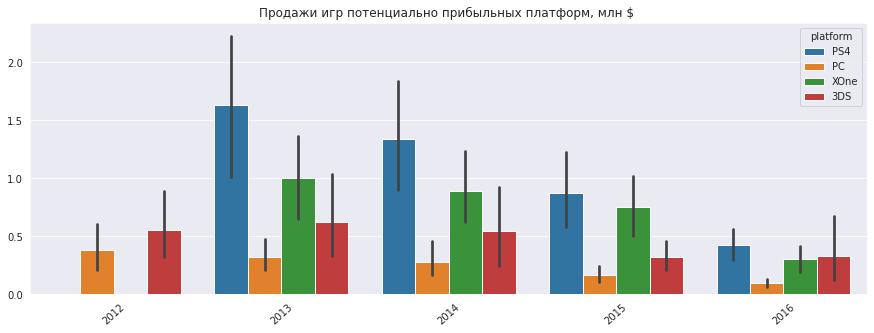

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = lead_games,
            hue_order = lead_platforms
           )

plt.title('Продажи игр потенциально прибыльных платформ, млн $ ')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

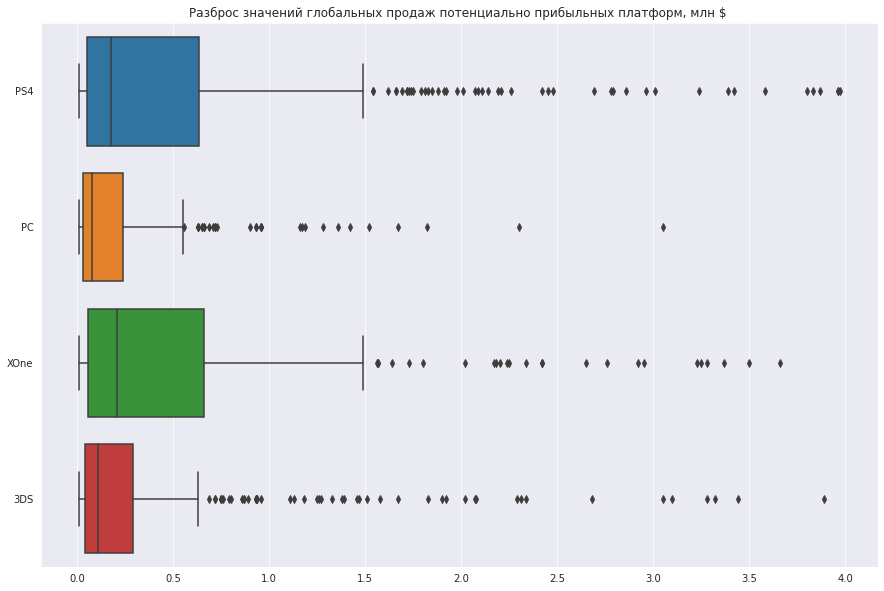

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(y='platform', x='total_sales',
            data = lead_games.query('total_sales < 4')
            ,order=lead_platforms, orient='h', 
           )
plt.title('Разброс значений глобальных продаж потенциально прибыльных платформ, млн $ ')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Вывод

Перспективными платформами являются PS4, XOne, 3DS и PC. Несмотря на то, что мы видим общий спад - лидеры и распределение прибылей не меняется. PS4 и XOne развиваются примерно одинаково, при этом PS4 продается чуть лучше, что связано с наличием эксклюзивных игр, в то время как политика Miscrosoft предполагает возможность игры и на PC. Также неплохо продается 3DS платформа, PC уступает консольным версиям, что связано с необходимостью обновления *железа* компьютера, что гораздо дороже покупки консоли  

Для исключение выбросов, при отборе значений для каждой платформы будем ограничивать общие продажи


### PS4. Влияние отзывов пользователей и критиков.

In [ ]:
ps4_df = games_12_16.loc[(games_12_16['total_sales'] < 4) 
                               & (games_12_16['platform']=='PS4')]
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
58,The Witcher 3: Wild Hunt,PS4,2015,role-playing,1.02,2.13,0.23,0.59,92.0,92.0,M,3.97
59,Assassin's Creed: Unity,PS4,2014,action,1.19,2.07,0.08,0.62,70.0,49.0,M,3.96
60,Batman: Arkham Knight,PS4,2015,action,1.53,1.69,0.10,0.64,87.0,76.0,M,3.96
62,NBA 2K16,PS4,2015,sports,2.49,0.66,0.03,0.69,87.0,67.0,E10+,3.87
63,Call of Duty: Ghosts,PS4,2013,shooter,1.78,1.43,0.05,0.57,78.0,37.0,M,3.83


In [ ]:
ps4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 58 to 2834
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             375 non-null    object 
 1   platform         375 non-null    object 
 2   year_of_release  375 non-null    int64  
 3   genre            375 non-null    object 
 4   na_sales         375 non-null    float64
 5   eu_sales         375 non-null    float64
 6   jp_sales         375 non-null    float64
 7   other_sales      375 non-null    float64
 8   critic_score     239 non-null    float64
 9   user_score       244 non-null    float64
 10  rating           375 non-null    object 
 11  total_sales      375 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 38.1+ KB


In [ ]:
def heatmap_plot(data):

    plt.figure(figsize=(15,5))
    plt.title('Тепловая карта корреляции и распределение влияния оценки критиков и пользователей')
    sns.heatmap(data[['total_sales', 'critic_score', 'user_score']].corr(), 
                annot=True, cmap='mako', fmt='.3f'
               )
    
    sns.jointplot(x='critic_score', y='total_sales', data=data, kind='scatter')
    sns.jointplot(x='user_score', y='total_sales', data=data, kind='scatter')
    plt.show()
   

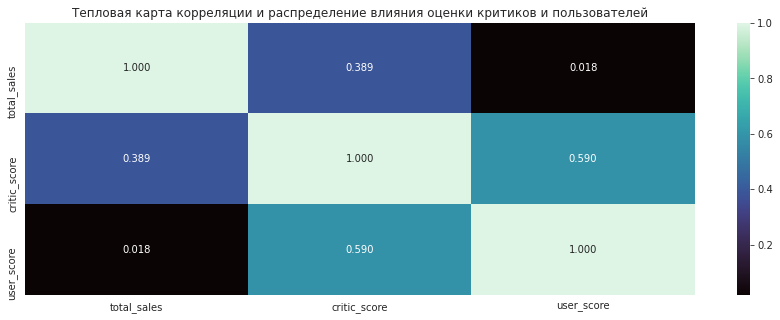

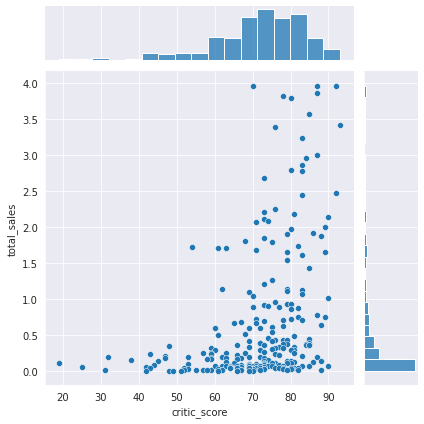

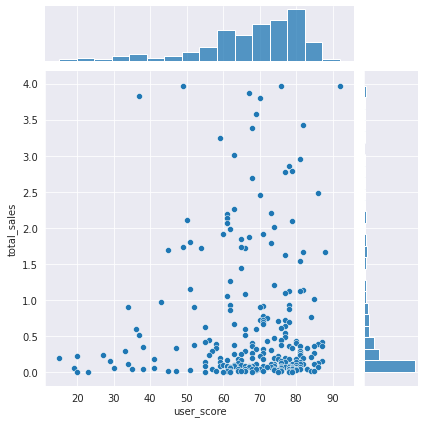

In [ ]:
heatmap_plot(ps4_df)

Наблюдаем положительную корреляция (прямую) между оценкой критиков и продажами и оценкой пользователей и продажей. При этом, оценка критиков **СЛАБО** коррелирует с продажами, оценка пользователей - **ОЧЕНЬ СЛАБО**. Стоит отметить, что наблюдаяется средняя корреляция между оценками пользователей и критиков, что может быть связано с некоторым влиянием оценки критика на мнение некоторых голосующих обывателей. Распределения ассиметричные.

### XOne. Влияние отзывов пользователей и критиков.

In [ ]:
xone_df = games_12_16.loc[(games_12_16['total_sales'] < 4) 
                               & (games_12_16['platform']=='XOne')]
xone_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
66,Star Wars Battlefront (2015),XOne,2015,shooter,2.04,1.28,0.02,0.32,NaN,NaN,RP,3.66
69,Assassin's Creed: Unity,XOne,2014,action,2.27,0.90,0.00,0.33,72.0,41.0,M,3.50
75,Destiny,XOne,2014,shooter,2.14,0.92,0.00,0.31,75.0,55.0,T,3.37
80,Gears of War: Ultimate Edition,XOne,2015,shooter,2.61,0.33,0.00,0.34,82.0,75.0,M,3.28
81,FIFA 16,XOne,2015,sports,0.89,2.12,0.00,0.24,84.0,44.0,E,3.25


In [ ]:
xone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 66 to 2871
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             242 non-null    object 
 1   platform         242 non-null    object 
 2   year_of_release  242 non-null    int64  
 3   genre            242 non-null    object 
 4   na_sales         242 non-null    float64
 5   eu_sales         242 non-null    float64
 6   jp_sales         242 non-null    float64
 7   other_sales      242 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       178 non-null    float64
 10  rating           242 non-null    object 
 11  total_sales      242 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.6+ KB


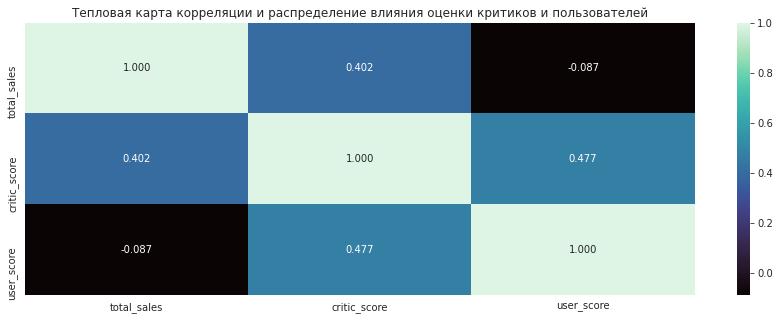

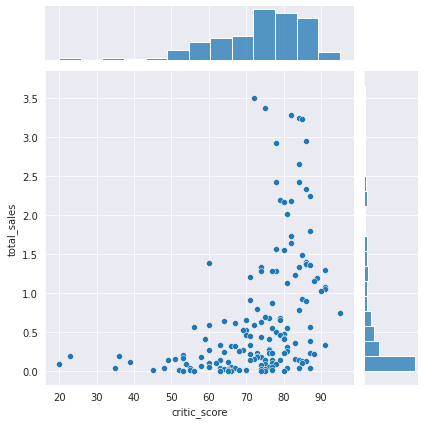

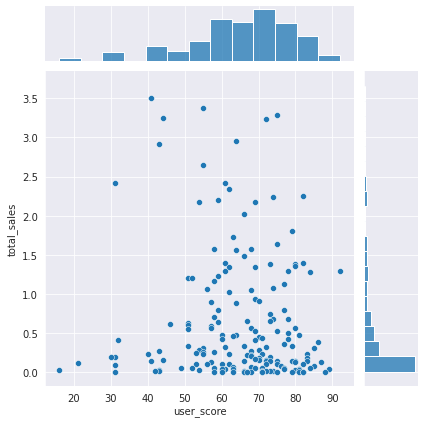

In [ ]:
heatmap_plot(xone_df)

Наблюдаем положительную корреляция (прямую) между оценкой критиков и продажами и отрицательную между оценкой пользователей и продажей. При этом, оценка критиков **СЛАБО** коррелирует с продажами, оценка пользователей - **ОЧЕНЬ СЛАБО**. Стоит отметить, что наблюдаяется средняя корреляция между оценками пользователей и критиков, что может быть связано с некоторым влиянием оценки критика на мнение некоторых голосующих обывателей, но это влияние меньше чем у PS4. Распределения ассиметричные.

### 3DS. Влияние отзывов пользователей и критиков.

In [ ]:
ds_df = games_12_16.loc[(games_12_16['total_sales'] < 4) 
                               & (games_12_16['platform']=='3DS')]
ds_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
61,Monster Hunter 4 Ultimate,3DS,2014,role-playing,0.68,0.48,2.62,0.11,86.0,87.0,T,3.89
72,Monster Hunter 4,3DS,2013,role-playing,0.00,0.00,3.44,0.00,NaN,NaN,RP,3.44
77,Monster Hunter X,3DS,2015,action,0.27,0.21,2.79,0.05,NaN,NaN,RP,3.32
79,Yokai Watch 2 Ganso/Honke,3DS,2014,role-playing,0.09,0.00,3.18,0.01,NaN,NaN,RP,3.28
87,The Legend of Zelda: A Link Between Worlds,3DS,2013,action,1.40,1.01,0.46,0.23,91.0,89.0,E,3.10


In [ ]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 61 to 2873
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             388 non-null    object 
 1   platform         388 non-null    object 
 2   year_of_release  388 non-null    int64  
 3   genre            388 non-null    object 
 4   na_sales         388 non-null    float64
 5   eu_sales         388 non-null    float64
 6   jp_sales         388 non-null    float64
 7   other_sales      388 non-null    float64
 8   critic_score     101 non-null    float64
 9   user_score       111 non-null    float64
 10  rating           388 non-null    object 
 11  total_sales      388 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.4+ KB


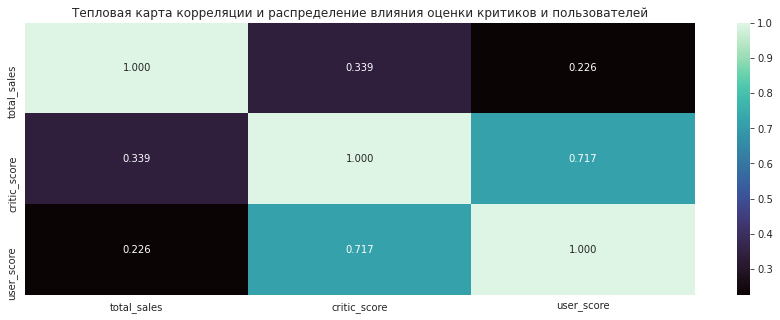

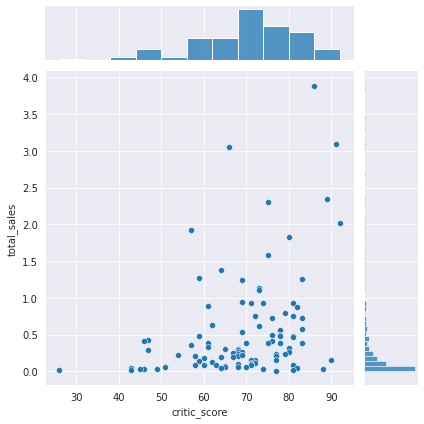

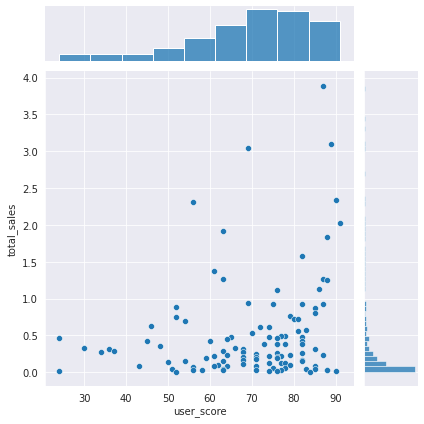

In [ ]:
heatmap_plot(ds_df)

Наблюдаем положительную корреляция (прямую) между оценкой критиков и продажами и оценкой пользователей и продажей. При этом, оценка критиков **ОЧЕНЬ СЛАБО** коррелирует с продажами, оценка пользователей - **ОЧЕНЬ СЛАБО**. Стоит отметить, что наблюдается средняя корреляция между оценками пользователей и критиков, что может быть связано с некоторым влиянием оценки критика на мнение некоторых голосующих обывателей.

### PC. Влияние отзывов пользователей и критиков.

In [ ]:
pc_df = games_12_16.loc[(games_12_16['total_sales'] < 3) 
                               & (games_12_16['platform']=='PC') 
                               & (games_12_16['critic_score']!=-1) 
                               & (games_12_16['user_score']!=-1)]
pc_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
122,Guild Wars 2,PC,2012,action,0.96,1.07,0.0,0.27,90.0,79.0,T,2.30
173,World of Warcraft: Mists of Pandaria,PC,2012,role-playing,0.84,0.76,0.0,0.22,82.0,48.0,T,1.82
196,StarCraft II: Heart of the Swarm,PC,2013,strategy,0.83,0.66,0.0,0.18,86.0,79.0,T,1.67
220,Call of Duty: Black Ops II,PC,2012,shooter,0.64,0.69,0.0,0.19,74.0,42.0,M,1.52
233,SimCity (2013),PC,2013,simulation,0.48,0.77,0.0,0.17,64.0,22.0,E10+,1.42


In [ ]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 122 to 2879
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             248 non-null    object 
 1   platform         248 non-null    object 
 2   year_of_release  248 non-null    int64  
 3   genre            248 non-null    object 
 4   na_sales         248 non-null    float64
 5   eu_sales         248 non-null    float64
 6   jp_sales         248 non-null    float64
 7   other_sales      248 non-null    float64
 8   critic_score     196 non-null    float64
 9   user_score       204 non-null    float64
 10  rating           248 non-null    object 
 11  total_sales      248 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.2+ KB


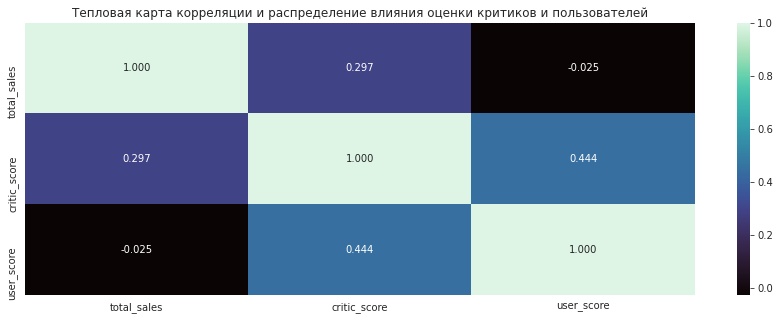

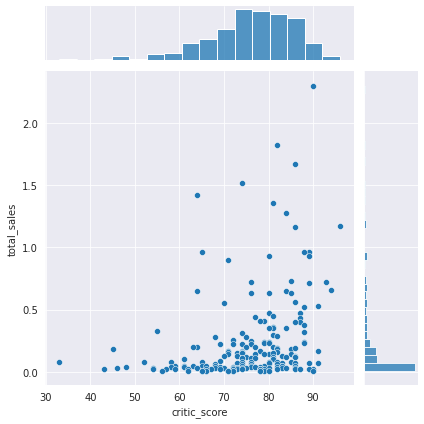

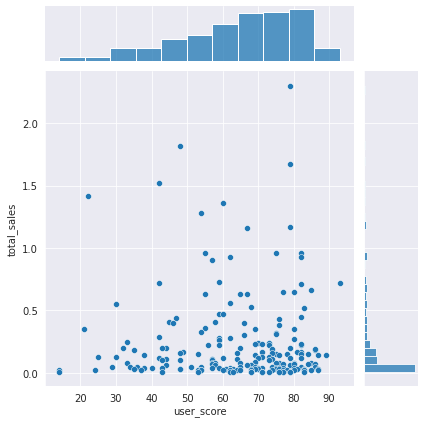

In [ ]:
heatmap_plot(pc_df)

Наблюдаем положительную корреляция (прямую) между оценкой критиков и продажами и оценкой пользователей и продажей. При этом, оценка критиков **СЛАБО** коррелирует с продажами, оценка пользователей - **ОЧЕНЬ СЛАБО**. Распределения ассиметричные.

Крупные проекты с большим бюджетом зачастую сопровождаются усиленной рекламной кампанией и продвижением, что может оказывать некоторое влияние на оценку критиков, в том числе из различных крупных игровых изданий. Также, критик будет оценивать игру зачастую в рамках определенного стандарта оценки, по строгим метрикам и показателям. Критик будет более объективен.

Пользователи ориентируются при оценке на собственные вкусовые субъективные преподчтения. Бывают случаи, что крупные, оцененные критиками игры, плохо принимаются пользователями, которые становятся требовательнее с каждым годом. Пользователь - субъективен.

Однако, наличие средней корреляции между оценками пользователей и критиков, может говорить о том, что бывают случаи, когда мнения сторон совпадает.

### Анализ игр по жанрам

In [ ]:
top_games = games_12_16.pivot_table(index='genre',columns='year_of_release'
                        ,values='total_sales',aggfunc='sum').copy()
top_games

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
action,119.25,122.51,97.23,72.02,30.11
adventure,5.79,6.09,5.57,8.16,3.82
fighting,9.18,7.09,15.85,7.90,4.47
misc,22.22,25.27,23.38,11.57,2.60
platform,18.37,24.54,8.81,6.05,3.23
puzzle,1.72,0.96,1.49,0.71,0.01
racing,13.61,12.37,16.66,8.07,2.79
role-playing,46.91,44.45,45.62,37.64,18.18
shooter,71.75,62.04,65.21,67.51,38.22


In [ ]:
top_list = ['action', 'role-playing', 'shooter', 'sports', 'platform', 'misc']

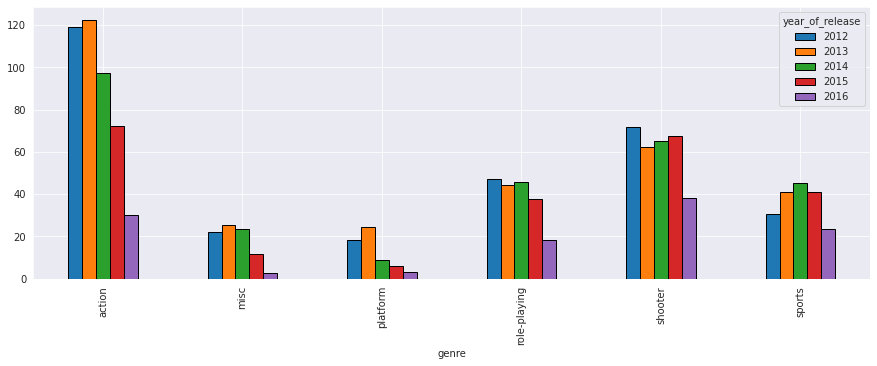

In [ ]:
top_games.query('genre in @top_list').plot(kind='bar', figsize=(15,5), edgecolor='black')
plt.title('')
plt.show()

Самый популярный жанр - action и shooter, а вот puzzle сходит совсем на нет. Также к полпулярным жанрам можно отнести RPG, platform и sports. Наибольшее падение выручки получили по жанру action, стаблинее развиваются shooter и RPG

### Вывод

Игровая индустрия начинает активно развиваться с 1994 года. Стоит отметить, что рейтинг ESRP применяют с 1993 года. Пики приходятся на 2006 - 2011 года, далее мы видим спад и с 2012 года некоторое выравнивание (от 500 до 652 игр в год - близко к уровню 2001 - 2006 года). Это может быть связано развитием игр на устройствах мобильной связи для Android или iOs. На протяжении последних лет скорость развития падает, прибыль падает.  

Медианное время жизни платформы составляет 10 лет, при этом временной цикл анонса новой консоли примерно 6-7 лет


Перспективными платформами являются PS4, XOne, 3DS и PC. Несмотря на то, что мы видим общий спад - лидеры и распределение прибылей не меняется. PS4 и XOne развиваются примерно одинаково, при этом PS4 продается чуть лучше, что связано с наличием эксклюзивных игр, в то время как политика Miscrosoft предполгает возможность игры и на PC. Также неплохо продается 3DS платформа, PC уступает консольным версиям, что связано с необходимостью обновления железа компьютера, что гораздо дороже покупки консоли  

Наибольшее падение выручки получили по жанру action, стабильнее развиваются shooter и RPG. На данны момент shooter находится в лидерах продаж, но примерно равен action. Таким образом - пользователей интересуют action, RPG и shooter

## Изучение пользователей видеоигр по регионам

Для удобства выведем наш датафрейм:

In [ ]:
games_12_16.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


Напишем функцию построения диаграмм для популярных жанров и платформ по регионам:

In [ ]:
def diag_plot (data, column, region):
    region_data = games_12_16.groupby([column])[region].sum().sort_values(ascending=False).head()
    data = region_data
    
    data.plot(y=column, kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )

    
    plt.title('Распределение платформ по выручке')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

### Регион NA

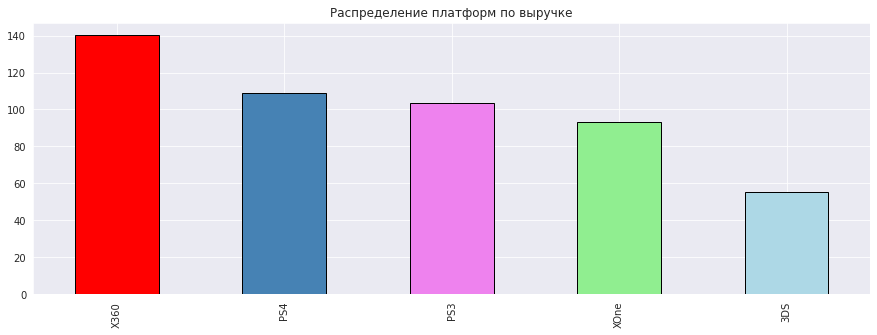

In [ ]:
diag_plot(games_12_16, 'platform', 'na_sales')

В Северной Америке самая популярная платформа - X360 - собственно там, где ее и происхождение. При этом с выходом консолей нового поколения - лидерство переходит к PS4. 3DS - наименее популярная консоль среди лидеров.

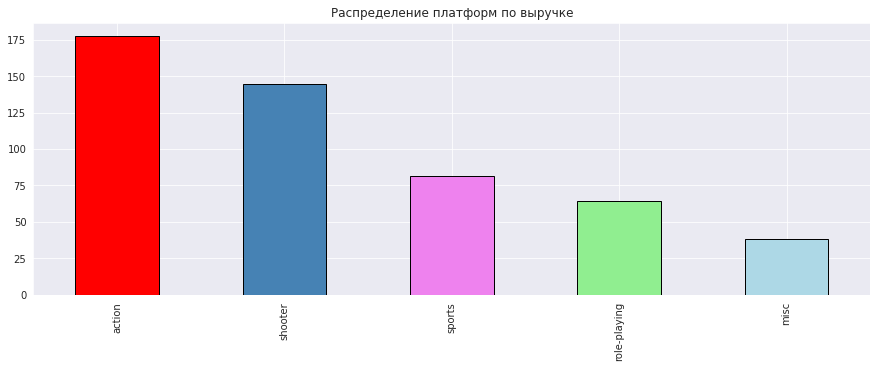

In [ ]:
diag_plot(games_12_16, 'genre', 'na_sales')

Что касается жанров, то самые популярны action и shooter, замыкает тройку лидеров игрры жанра sport

### Регион EU

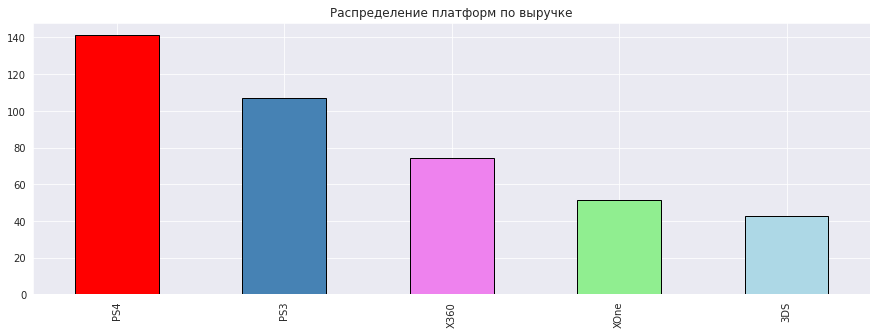

In [ ]:
diag_plot(games_12_16, 'platform', 'eu_sales')

У Европейских пользователей в лидерах PS4 и PS3, консоль компании Microsoft пользуется гораздо меньшим успехом, нежеле в Северной америке

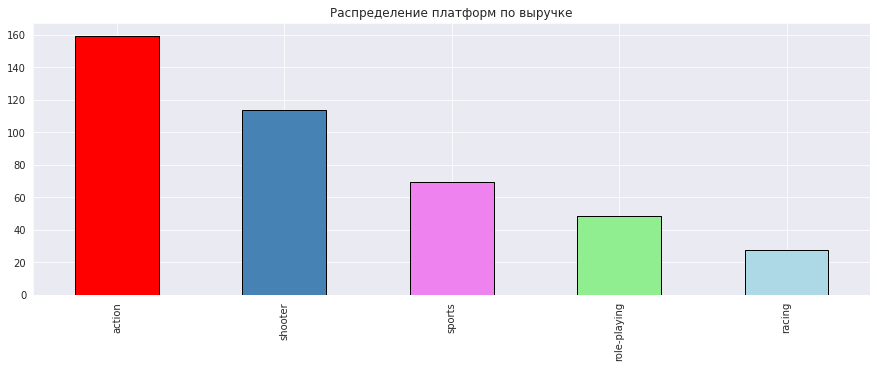

In [ ]:
diag_plot(games_12_16, 'genre', 'eu_sales')

### Регион JP

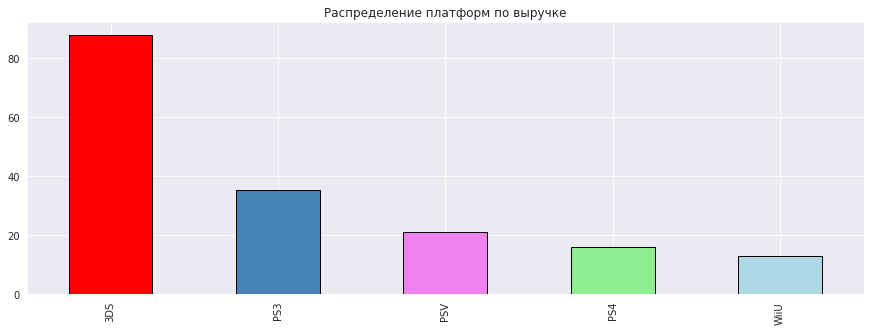

In [ ]:
diag_plot(games_12_16, 'platform', 'jp_sales')

У японских пользователей предпочтения отдаются приставки компании Nintendo и Sony. При этом в топ-5 вошли целых две портативных консоли. Японские пользователи отдают предпочтения местынм производителям консолей

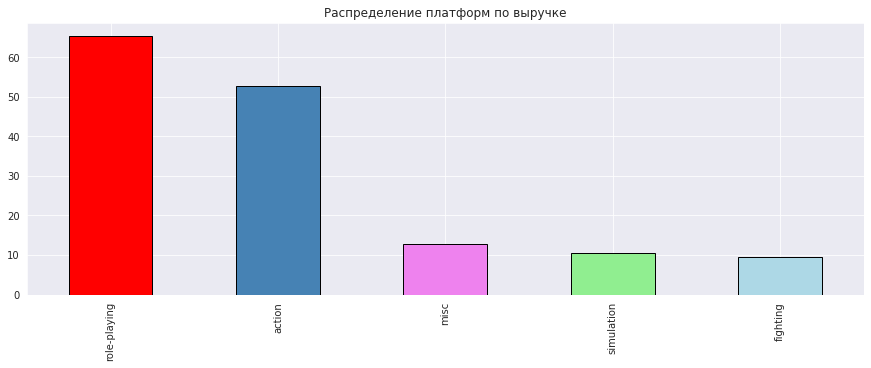

In [ ]:
diag_plot(games_12_16, 'genre', 'jp_sales')

Ожидаемо, что японские пользователи предпочитают RPG (множество знаменитых RPG произошли из японии, есть отдельный поджанр - [jRPG](https://ru.wikipedia.org/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0)), далее идут action.

Если Европа и Америка более менее схожи в предпочтении, то Япония явно выделяется на их уровне.
Японцы зачастую много работают (свыше [60](https://rb.ru/story/karoshi/) часов в неделю) - при таком подходе - времени на домашнюю стационарную консолль не останется - возможно поэтому и лидируют портативные консоли.  К тому же, жилье японцев зачастую небольшое по площади - выбор в пользу портативной платформы - сэкономит место (нет необходимости покупать монитор или телевизор и сама консоль не будет занимать места)

Что касается RPG - то ролевые игры предлагают пользователю погружение и увлечение надолгое время, в отличие от шутеров или экшн, некоторое погружение и сопоставления себя и персонажа, что помогает отвлечься от усталости


### Влияние рейтинга ESRB

Построим

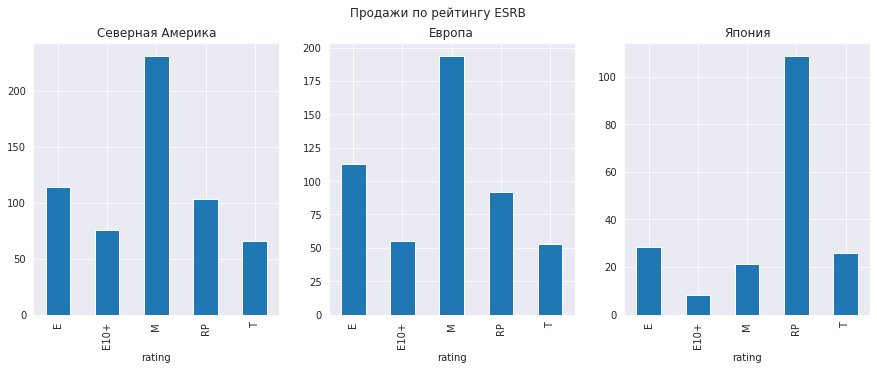

In [ ]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['Северная Америка', 'Европа','Япония']


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Продажи по рейтингу ESRB')
for i, sale in enumerate(region_sales):
    for region in regions:
        games_12_16.groupby('rating')[sale].sum().plot(
                                                       kind='bar', ax=ax[i], title=regions[i]
                                                       
                                                      )
    

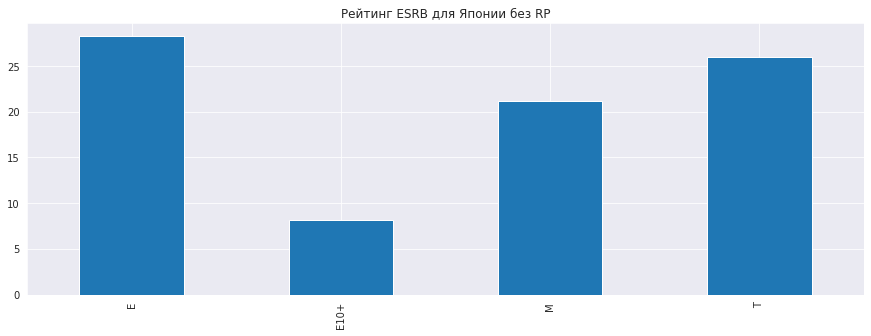

In [ ]:
games_12_16.query('rating != "RP"').groupby('rating')['jp_sales'].sum().plot(kind='bar', figsize=(15,5))
plt.title('Рейтинг ESRB для Японии без RP')
plt.xlabel('')
plt.show()

В Северной Америке и Европе мы видим, что самые популярные игры отмечены знаком «M» («Mature»). Если вспомнить, какие жанры популярны в данных регионах (шутеры и экшн), можно сказать, что пользователи преподчитают игры с элементами насилия (например, игры про военные операции, игры, поддерживающие PVP режимы (игрок-против-игрока)). В Японии много игр не отмечены рейтингом. 3DS не пользуется популярностью у пользователей других регионов, поэтому дистрибьютеры не спешат выводить множество игр на рынки. Если не брать RP во внимание, то в Японии популярны игры, отмеченные рейтингом для всех - E.

Для [справки](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):  

- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone». 
 
 
- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")  
  
  
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.  
  
  
- **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование  
  
  
- **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.  
  
  
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.  
  
  
- **«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу  

### Вывод

В Северной Америке самая популярная платформа - X360 - собственно там, где ее и происхождение. При этом с выходом консолей нового поколения - лидерство переходит к PS4. 3DS - наименее популярная консоль среди лидеров.  

У Европейских пользователей в лидерах PS4 и PS3, консоль компании Microsoft пользуется гораздо меньшим успехом, нежеле в Северной Америке, но оба региона схожи в том, что 3ds наименее популярная.  

У японских пользователей предпочтения отдаются приставки компании Nintendo и Sony. При этом в топ-5 вошли целых две портативных консоли. Японские пользователи отдают предпочтения местынм производителям консолей


Касательно жанров - пользователи Америки и Европы предпочитают экшн игры и шутеры с рейтингом М, Японские пользователи предпочитают игры для 3DS и ролевы игры. Чаще всего игры имеют в японии либо рейтинг [RP либо E](https://www.esrb.org/search/?searchKeyword=&platform=Nintendo%203DS&rating=E%2CE10%2B%2CT%2CM%2CAO&descriptor=All%20Content&pg=4&searchType=All)

## Проверка статистических гипотез

Для удобства выведем датафрейм

In [ ]:
games_12_16.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим как отличаются средние пользовательские рейтинги платформ Xbox One и PC.
Построим гипотезы: Сформулируем ее как Гипотезу о равенстве средних двух генеральных совокупностей

H0 (нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC **равны**.

H1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC **не равны**.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод `scipy.stats.ttest_ind (array1, array2, equal_var)`, при этом критический уровень статистической значимости alpha принимаем как .05  

Для начала оценим наши выборки. Это позволит нам выяснить какой параметр equal_var нам применять в тест Стьюдента. Проведем тест Левена и рассмотрим различатся ли дисперсии наших выборок.

In [ ]:
# сделаем выборки

xbox_gamers = games_12_16.query('platform == "XOne"')
pc_gamers = games_12_16.query('platform == "PC"')

# создадим списки самплов

sample_1 = xbox_gamers['user_score'][xbox_gamers['user_score'].notna()].tolist()
sample_2 = pc_gamers['user_score'][pc_gamers['user_score'].notna()].tolist()
alpha = .05
stat, p = st.levene(sample_1, sample_2)
result_levene = p

# проведем тест Левена

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются, equal_var=False для ttest')
else:
    print("Не отвергаем Н0, дисперсии не различаются, equal_var=True для ttest")

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Дисперсии по выборкам: ', var_sample)


Отвергаем Н0, дисперсии различаются, equal_var=False для ttest
Дисперсии по выборкам:  [190.69968429360694, 277.04439971584185]


In [ ]:
# Проведем ttest, equal_var=False

alpha = .05 
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")




p-значение: 0.5489537965135056
Не отвергаем Н0


Нулевыю гипотезу не отвергаем:
Средние пользовательские рейтинги платформ Xbox One и PC равны.

Посмотрим средние значения и удостоверимся в этом

In [ ]:
print('Средняя пользовательская оценка XOne: {:.2f}'.format(
                                                      xbox_gamers['user_score'][xbox_gamers['user_score'].notna()].mean())
                                                      )
print('Средняя пользовательская оценка PC: {:.2f}'.format(
                                                    pc_gamers['user_score'][pc_gamers['user_score'].notna()].mean())
                                                    )

Средняя пользовательская оценка XOne: 65.21
Средняя пользовательская оценка PC: 64.29


Действительно, в нашей выборке средние примерно равны

### Средние пользовательские рейтинги жанров Action и Sports разные

Проверим как отличаются cредние пользовательские рейтинги жанров Action и Sports. Построим гипотезы: Сформулируем ее как Гипотезу о равенстве средних двух генеральных совокупностей

H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports равны.

H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports не равны.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод `scipy.stats.ttest_ind (array1, array2, equal_var)`, при этом критический уровень статистической значимости alpha принимаем как .05

Для начала оценим наши выборки. Это позволит нам выяснить какой параметр equal_var нам применять в тест Стьюдента. Проведем тест Левена и рассмотрим различатся ли дисперсии наших выборок.

In [ ]:
# сделаем выборки

action_gamers = games_12_16.query('genre == "action"')
sports_gamers = games_12_16.query('genre == "sports"')

# создадим списки самплов

sample_01 = action_gamers['user_score'][action_gamers['user_score'].notna()].tolist()
sample_02 = sports_gamers['user_score'][sports_gamers['user_score'].notna()].tolist()
alpha = .05
stat, p = st.levene(sample_01, sample_02)
result_levene = p

# проведем тест Левена

if result_levene < alpha:
    print('Отвергаем Н0, дисперсии различаются, equal_var=False для ttest')
else:
    print("Не отвергаем Н0, дисперсии не различаются, equal_var=True для ttest")

var_sample_1 = [np.var(x, ddof=1) for x in [sample_01, sample_02]]
print('Дисперсии по выборкам: ', var_sample_1)


Отвергаем Н0, дисперсии различаются, equal_var=False для ttest
Дисперсии по выборкам:  [188.90840494348112, 302.2890298704732]


In [ ]:
# Проведем ttest, equal_var=False

alpha = .05 
results = st.ttest_ind(sample_01, sample_02, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")




p-значение: 4.243077765726105e-20
Отвергаем Н0


Отвергаем нулевую гипотезу. Вероятнее всего, верно утверждение:  
Средние пользовательские рейтинги жанров Action и Sports не равны  

Посмотрим наши средние в выборке:

In [ ]:
print('Средняя пользовательская оценка Action: {:.2f}'.format(
                                                        action_gamers['user_score'][action_gamers['user_score'].notna()].mean())
                                                        )
print('Средняя пользовательская оценка Sports: {:.2f}'.format(
                                                        sports_gamers['user_score'][sports_gamers['user_score'].notna()].mean())
                                                         )

Средняя пользовательская оценка Action: 68.25
Средняя пользовательская оценка Sports: 54.56


Так и есть. Разные жанры, разные потребители, а значит и разные вкучы, что влияет на оценку пользователя. 

## Вывод

По результатам анализа, предоставленных данных по 2016 год был взят актуальный период для изучения: с 2012 года по 2016 года, для прогнозирования стратегии развития на 2017 год.


**Перспективными платформами являются Playstation 4 и Xbox One**. 3DS от Nintendo стоит рассматривать только в случае ориентирования на рынок Японии. Для отечественного рынка применимы результаты исследования Европы. Соответственно, **перспективными жанрами будут action и shooter с рейтингом М** и высокой оценкой критиков - такие игры вероятнее всего будут пользоваться спросом. Спортивные игры также популярны - их стоит также рассмотреть для реализации на рынке.  

PC является менее перспективным чем консоли на данный момент, что может быть связано с развитием online сервисов по покупке игр - то есть необходимость физических носителей отпадает.

Стоит отметить, что средняя оценка пользователей не зависит от платформы. Если продукт качественный - то платформа игры не имеет значение.


Таким образом,  

сконцентрировать свое внимание необходимо на консолях 8го поколения PS4 и Xbox One, при этом первая в приоритете, и играх жанров action и shooter с рейтингом M
